# Examen Uziel Barrio González
## Prueba: Entender si en la siguiente semana el precio de una acción subirá o bajará

In [2]:
# @title 1: Cargando los paquetes necesarios

# Cargando los paquetes necesarios
   #DESMARCAR SI ES NECESARIO PARA USAR LOS PAQUETES
#!pip install yfinance
import yfinance as yf
import pandas as pd

In [3]:
# @title 2: Descargar la información y análisis inicial
## Me gustaría pronósticar el valor SOXL, esto es importante porque multiplica x3 el valor de los semiconductores.
## Crear un objeto Ticker para este ETF
#main_df = yf.Ticker("SOXL")

# Obtener el historial de precios de este activo (en dólares, para la máxima de información que se tenga disponible)
#main_df = main_df.history(period="max")  # Puedes cambiar el periodo, por ejemplo, "1d", "5d", "1mo", "3mo", "6mo", "1y", "2y", "5y", "10y", "ytd", "max"


## Asegurarse de que el índice es de tipo DateTime
#main_df.index = pd.to_datetime(main_df.index)

## Crear nuevas columnas de día, mes, año y día de la semana; extrayendo la información del índice
#main_df['Day'] = main_df.index.day
#main_df['Month'] = main_df.index.month
#main_df['Year'] = main_df.index.year
#main_df['DayOfWeek'] = main_df.index.day_name()

#Ahora guardo el main_dataframe en un CSV
#from google.colab import drive
#drive.mount('drive')

#main_df.to_csv('data.csv')
#!cp data.csv "drive/My Drive/"

# Mostrando las principales estadísticas de nuestra variable. Note que tenemos +3500 observaciones
#main_df.describe()

In [4]:
#Cargando la información que previamente fue cargada en GITHUB

link_github = "https://raw.githubusercontent.com/uzbalz/SOXL-forecast/a0d24435a443d1e4accf92ebea1a0df0fbbaf4e1/data.csv"

main_df = pd.read_csv(link_github, index_col=0)  # Assuming the first column is the index

# Convert the index to datetime
main_df.index = pd.to_datetime(main_df.index, errors='coerce')

# Create a datetime column by combining year, month, and day
main_df['date'] = pd.to_datetime(main_df[['Year', 'Month', 'Day']])

# Set the new datetime column as the index
main_df.set_index('date', inplace=True)

# Drop the original year, month, and day columns if needed
main_df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

# Check the type of the index
print(type(main_df.index))

main_df.head()


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


<ipython-input-4-d7623c7edb4d>:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  main_df.index = pd.to_datetime(main_df.index, errors='coerce')


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,DayOfWeek
date,,,,,,,,,
2010-03-11,0.591038,0.607596,0.591038,0.607596,3702000,0.0,0.0,0.0,Thursday
2010-03-12,0.608056,0.612042,0.592571,0.592571,4548000,0.0,0.0,0.0,Friday
2010-03-15,0.580612,0.586898,0.564974,0.573866,534000,0.0,0.0,0.0,Monday
2010-03-16,0.581072,0.621088,0.580152,0.620474,1260000,0.0,0.0,0.0,Tuesday
2010-03-17,0.643932,0.650371,0.631207,0.642859,2610000,0.0,0.0,0.0,Wednesday


In [5]:
# Estudiar este ETF es de alta relevancia desde que es posible que de rentabilidades anuales medias de 70% o más
y_soxl_df =main_df.resample('Y').last()
y_soxl_df = y_soxl_df.filter(regex=r'^Close')

y_soxl_df["TasaAnual"] = y_soxl_df['Close'].diff() / y_soxl_df['Close'].shift(1) * 100

y_soxl_df.describe()


,Close,TasaAnual
count,15.000000,14.000000
mean,15.711782,75.145438
std,21.159882,100.664300
min,0.398126,-85.663098
25%,1.350375,-14.536053
50%,5.405005,86.143992
75%,24.215975,137.148909
max,66.738655,231.826594


In [6]:
# Filtrar las filas donde el índice es mayor que '2019-06-01 23:00' y mostrar las primeras filas
filtered_soxl_df = main_df.loc[main_df.index > '2019-06-01']
filtered_soxl_df = filtered_soxl_df.loc[filtered_soxl_df.index < '2024-06-20']

# Guardamos la información de los últimos 5 años por considerar que son los relevantes con suficiente memoria
filtered_soxl_df = filtered_soxl_df.drop(columns = ["Dividends", "Stock Splits", "Capital Gains"])
filtered_soxl_df['Volume'] = filtered_soxl_df['Volume'] / 1e6  #Será mejor interpretar en millones
print("Celdas de relevancia (a partir de 2019- hace 5 años)")
filtered_soxl_df.head()


Celdas de relevancia (a partir de 2019- hace 5 años)


,Open,High,Low,Close,Volume,DayOfWeek
date,,,,,,
2019-06-03,7.147137,7.343394,6.833256,6.954780,23.4105,Monday
2019-06-04,7.343394,7.852233,7.141938,7.837286,32.1510,Tuesday
2019-06-05,8.095281,8.101130,7.378487,7.681321,25.5330,Wednesday
2019-06-06,7.678721,8.082933,7.629333,8.000401,14.1765,Thursday
2019-06-07,8.056939,8.323381,8.019897,8.251247,14.0910,Friday


Desde los últimos 5 años, el valor del índice ha crecido 835.43 %


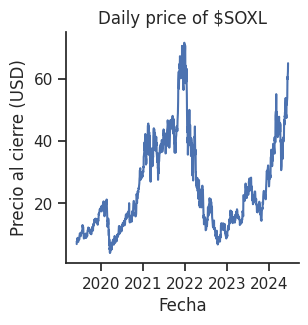

In [27]:
# @title 3) Análisis gráfico.

#Sugerencia https://www.sergilehkyi.com/es/2018/10/tips-on-working-with-datetime-index-in-pandas/

import seaborn as sns
from matplotlib import pyplot as plt

# Estilo de Seaborn
sns.set(style="ticks")

# Trama usando Seaborn
plt.figure(figsize=(3, 3))
sns.lineplot(data=filtered_soxl_df['Close'])
plt.title('Daily price of $SOXL')
plt.ylabel("Precio al cierre (USD)")
plt.xlabel("Fecha")

# Quitar bordes superior y derecho
sns.despine(right=True, top=True)
#plt.show()

first_observation = filtered_soxl_df.head(1)
last_observation = filtered_soxl_df.tail(1)

soxl_growth = (last_observation["Close"].iloc[0] / first_observation["Close"].iloc[0] - 1 )* 100
print("Desde los últimos 5 años, el valor del índice ha crecido", round(soxl_growth, 2), "%")


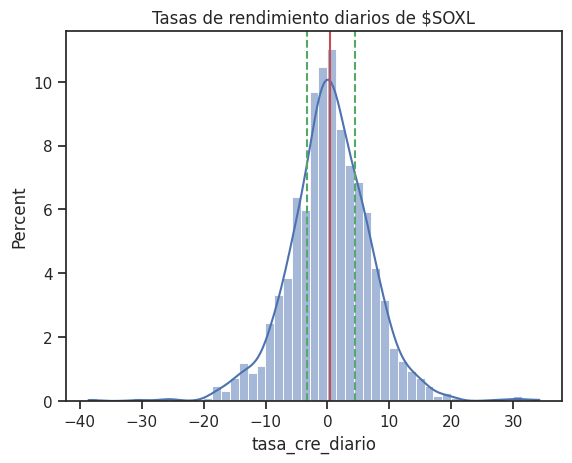

Las estadísticas muestran que en promedio siempre es esperable una tasa positiva


,Open,High,Low,Close,Volume,tasa_cre_diario
count,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1270.000000
mean,25.265833,26.100837,24.326261,25.260907,43.633165,0.398236
std,14.680029,15.122367,14.114027,14.659245,34.573127,6.626110
min,4.126502,4.834594,3.491506,4.173491,2.637000,-38.592955
25%,13.767436,14.194133,13.124978,13.679882,14.139600,-3.377653
50%,20.191105,21.110470,19.513273,20.247986,37.044000,0.385363
75%,37.210392,38.613175,35.887453,37.089245,64.487500,4.384877
max,72.685362,72.822749,68.298929,71.625557,284.532700,34.257608


In [8]:
# Ahora, me interesa ver la distribución de los crecimientos diarios

# Calcular la diferencia entre cada elemento y el anterior
filtered_soxl_df['tasa_cre_diario'] = filtered_soxl_df['Close'].diff() / filtered_soxl_df['Close'].shift(1) * 100
filtered_soxl_df.head()

# Crear un histograma usando seaborn
sns.histplot(filtered_soxl_df['tasa_cre_diario'], kde=True, stat = "percent")
plt.title('Tasas de rendimiento diarios de $SOXL')

# Agregar una línea vertical en0.377ediana y en los quantiles
plt.axvline(x=0.398, color='r', linestyle='-')
plt.axvline(x=-3.377, color='g', linestyle='--')
plt.axvline(x=4.384, color='g', linestyle='--')

# Mostrar el gráfico
plt.show()

print("Las estadísticas muestran que en promedio siempre es esperable una tasa positiva")
filtered_soxl_df.describe()

Ahora es más claro ver las diferencias alrededor del 0


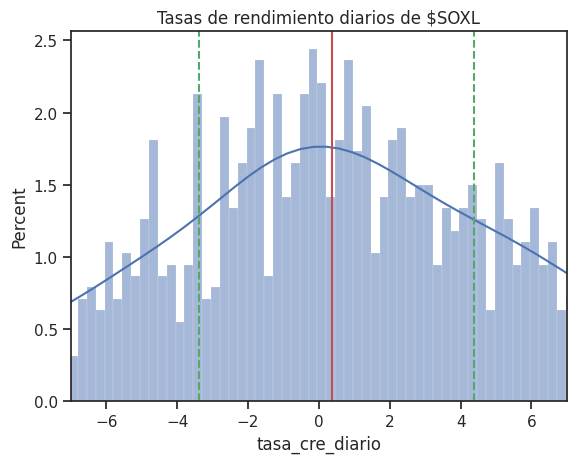

Además, es importante ver que el 52.2 % de los días, el valor de $SOXL aumenta, por lo que se vuelve relevante para saber cuando entrar a comerciar


In [9]:
# La se observó que la distribución es muy "picuda", por lo que para ver mejor la dsitribución, se limita el crecimiento a -5% y 5%
# Calcular la diferencia entre cada elemento y el anterior
filtered_soxl_df['tasa_cre_diario'] = filtered_soxl_df['Close'].diff() / filtered_soxl_df['Close'].shift(1) * 100

filtered_soxl_df['Increases'] = filtered_soxl_df['tasa_cre_diario'].apply(lambda x: 1 if x > 0 else 0)


# Crear un histograma usando seaborn
sns.histplot(filtered_soxl_df['tasa_cre_diario'], kde=True, binwidth= 0.25, stat = "percent")
plt.title('Tasas de rendimiento diarios de $SOXL')

# Agregar una línea vertical en0.377ediana y en los quantiles
plt.axvline(x=0.377, color='r', linestyle='-')
plt.axvline(x=-3.382, color='g', linestyle='--')
plt.axvline(x=4.38, color='g', linestyle='--')

# Limitar el rango del eje x de -7 a 7
plt.xlim(-7, 7)

# Mostrar el gráfico
print("Ahora es más claro ver las diferencias alrededor del 0")
plt.show()


prom_incr_soxl = filtered_soxl_df['Increases'].mean()*100
print("Además, es importante ver que el", round(prom_incr_soxl,1), "% de los días, el valor de $SOXL aumenta, por lo que se vuelve relevante para saber cuando entrar a comerciar")


Nótese que la correlación es muy débil (no hay evidencias de que una subida en el precio ayer, implique una subida hoy)
Sin embargo, por la correlación negativa, pareciera ser que si el día de ayer hubo una subida, el día de hoy debería esperarse una caída del precio de cierre


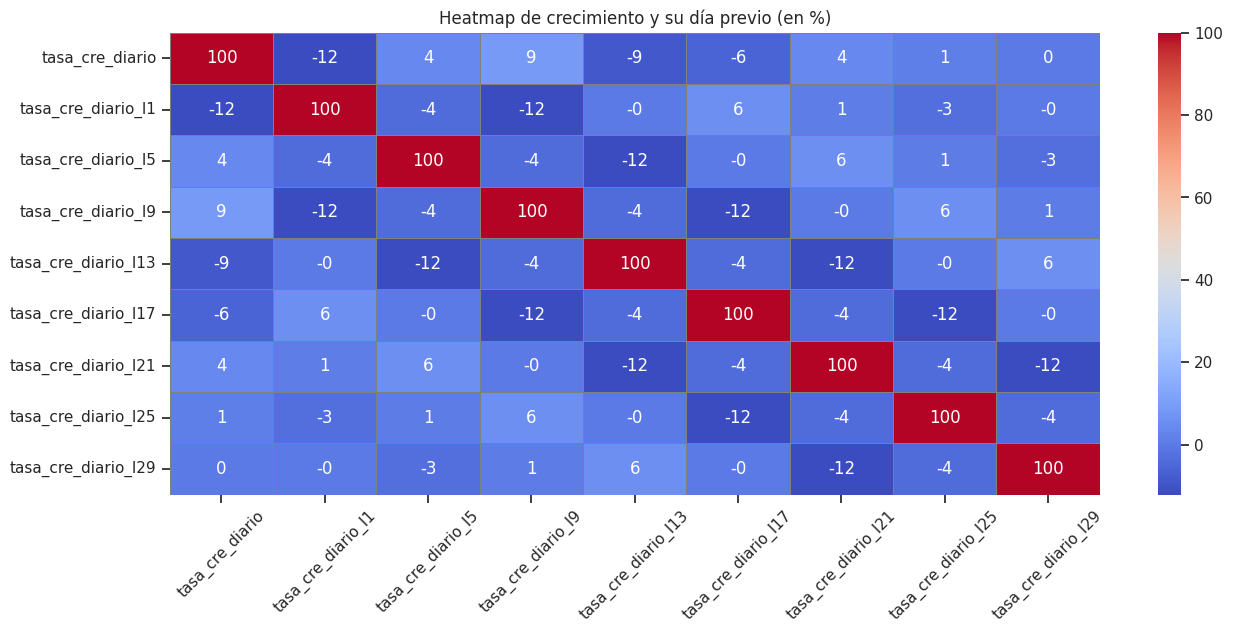

In [10]:
# Veámos si hay persistencia en la serie
tserie_soxl_df = filtered_soxl_df.copy()

# Iterar para crear nuevas columnas con el desplazamiento
for i in range(1, 30, 4):
    new_col_name = f"tasa_cre_diario_l{i}"
    tserie_soxl_df[new_col_name] = tserie_soxl_df['tasa_cre_diario'].shift(i)

tserie_soxl_df = tserie_soxl_df.filter(regex=r'^tasa_cre_diario')
tserie_soxl_corr_matriz = tserie_soxl_df.corr() * 100

# Crear el mapa de calor
plt.figure(figsize=(15, 6))  # Tamaño del gráfico
sns.heatmap(tserie_soxl_corr_matriz, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='gray', fmt=".0f")

# Ajustes adicionales
plt.title('Heatmap de crecimiento y su día previo (en %)')  # Título del gráfico
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x

# Mostrar el gráfico
print("Nótese que la correlación es muy débil (no hay evidencias de que una subida en el precio ayer, implique una subida hoy)\nSin embargo, por la correlación negativa, pareciera ser que si el día de ayer hubo una subida, el día de hoy debería esperarse una caída del precio de cierre")
plt.show()

En este caso nos sirve estudiar únicamente la primera fija/columa, donde es notable observar como no hay información relevante en el cambio en el Volumen


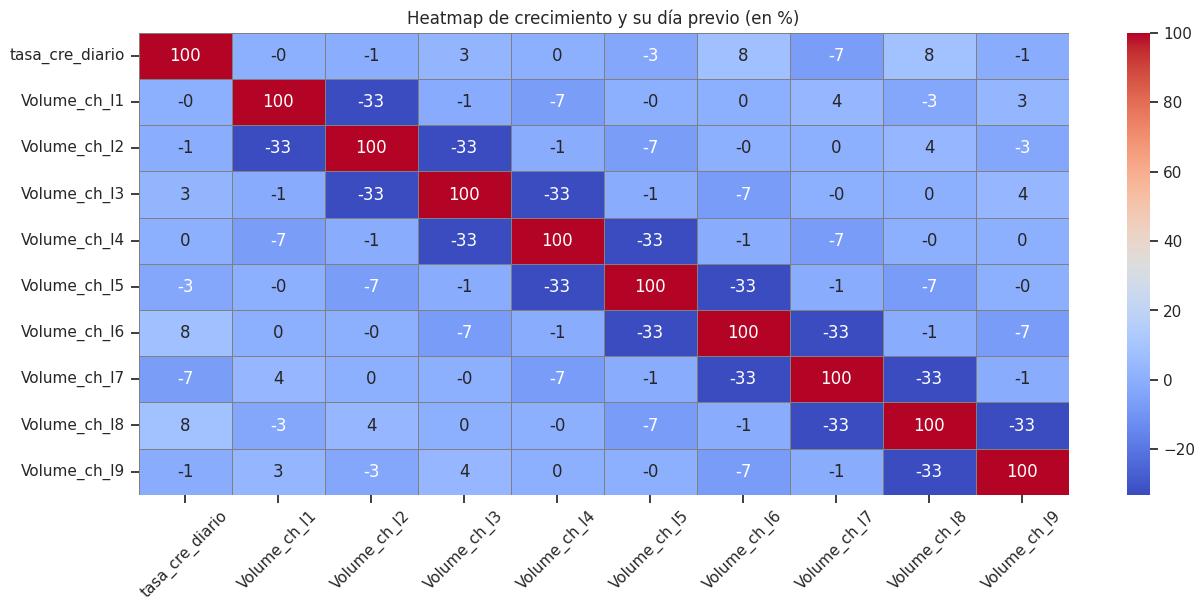

In [11]:
# Ahora veamos si la tendencia de Volumen de transacciones dice algo del cambio de precio
tserie_soxl_df = filtered_soxl_df.copy()

tserie_soxl_df["Volume_Ch"] = filtered_soxl_df['Volume'].diff() / filtered_soxl_df['Volume'].shift(1) * 100
# Iterar para crear nuevas columnas con el desplazamiento
for i in range(1, 10, 1):
    new_col_name = f"Volume_ch_l{i}"
    tserie_soxl_df[new_col_name] = tserie_soxl_df['Volume_Ch'].shift(i)

tserie_soxl_df = tserie_soxl_df.filter(regex=r'^tasa_cre_diario|Volume_ch')
tserie_soxl_corr_matriz = tserie_soxl_df.corr() * 100

# Crear el mapa de calor
plt.figure(figsize=(15, 6))  # Tamaño del gráfico
sns.heatmap(tserie_soxl_corr_matriz, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='gray', fmt=".0f")

# Ajustes adicionales
plt.title('Heatmap de crecimiento y su día previo (en %)')  # Título del gráfico
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x

# Mostrar el gráfico
print("En este caso nos sirve estudiar únicamente la primera fija/columa, donde es notable observar como no hay información relevante en el cambio en el Volumen")
plt.show()


In [12]:
# @title Análisis Multivariado. Los HOLDINGS de $SOXL

# Como el comportamiento de SOXL no necesariamente depende del nivel de persistencia de la serie, sino que también podría (y de hecho, debe hacerlo) depende de sus posesiones.
# SOXL, al ser un ETF de semiconductores, debería de responder directamente del costo de las acciones de empresas dedicadas a este ramo.
# Las principales empresas de semiconductores son: AMD ($AMD), NVIDIA ($NVDA), Broadcom ($AVGO), Intel ($INTC), MEDIATEK ($2454), Qualcom ($QCOM) y Samsung ($SMSNN)

"""
#Definiendo una función que descargue todos la información de todos los TICKERS
symbols = ["SOXL", "AMD", "NVDA", "AVGO", "INTC", "2454.TW", "QCOM", "SMSN.IL"]

# Dictionary to store DataFrames for each symbol
stock_data = {}

# Loop through each symbol
for symbol in symbols:
    # Fetch historical price data using yfinance
    main_df = yf.Ticker(symbol)
    main_df = main_df.history(period="max")

    # Ensure DateTime index
    main_df.index = pd.to_datetime(main_df.index)

    # Create additional columns
    main_df['Day'] = main_df.index.day
    main_df['Month'] = main_df.index.month
    main_df['Year'] = main_df.index.year
    main_df['DayOfWeek'] = main_df.index.day_name()

    # Filter and rename columns
    main_df = main_df.filter(regex=r'^Close')
    main_df = main_df.rename(columns={"Close": symbol})

    main_df = main_df.loc[main_df.index > '2019-06-01']
    main_df = main_df.loc[main_df.index < '2024-06-20']

    #main_df.index = pd.date_range(start='2019-06-03', periods=len(main_df))

    # Store DataFrame in dictionary
    stock_data[symbol + '_DF'] = main_df

#stock_data
"""

#Mergin dataframes
"""
merged_df = pd.merge(stock_data["SOXL_DF"], stock_data["AMD_DF"], left_index=True, right_index=True, how='left')

merged_df

symbols = ["NVDA", "INTC", "QCOM"]
for symbol in symbols:
  merged_df = pd.merge(merged_df, stock_data[symbol + '_DF'], left_index=True, right_index=True, how='left')

#Note that Samsung and Mediatek were removed because their different coins
merged_df['Day'] = merged_df.index.day
merged_df['Month'] = merged_df.index.month
merged_df['Year'] = merged_df.index.year
merged_df

#Ahora guardo el main_dataframe en un CSV
#from google.colab import drive
#drive.mount('drive')

merged_df.to_csv('data2.csv')
!cp data2.csv "drive/My Drive/"
"""

'\nmerged_df = pd.merge(stock_data["SOXL_DF"], stock_data["AMD_DF"], left_index=True, right_index=True, how=\'left\')\n\nmerged_df\n\nsymbols = ["NVDA", "INTC", "QCOM"]\nfor symbol in symbols:\n  merged_df = pd.merge(merged_df, stock_data[symbol + \'_DF\'], left_index=True, right_index=True, how=\'left\')\n\n#Note that Samsung and Mediatek were removed because their different coins\nmerged_df[\'Day\'] = merged_df.index.day\nmerged_df[\'Month\'] = merged_df.index.month\nmerged_df[\'Year\'] = merged_df.index.year\nmerged_df\n\n#Ahora guardo el main_dataframe en un CSV\n#from google.colab import drive\n#drive.mount(\'drive\')\n\nmerged_df.to_csv(\'data2.csv\')\n!cp data2.csv "drive/My Drive/"\n'

In [13]:
#Descargando la base de reciente creación por si hubiese problemas con yfinance

link_github2 = "https://raw.githubusercontent.com/uzbalz/SOXL-forecast/main/data3.csv"

merged_df = pd.read_csv(link_github2, index_col=0)  # Assuming the first column is the index

# Convert the index to datetime
merged_df.index = pd.to_datetime(merged_df.index, errors='coerce')

# Create a datetime column by combining year, month, and day
merged_df['date'] = pd.to_datetime(merged_df[['Year', 'Month', 'Day']])

# Set the new datetime column as the index
merged_df.set_index('date', inplace=True)

# Drop the original year, month, and day columns if needed
merged_df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

# Check the type of the index
print(type(merged_df.index))

merged_df.head()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


<ipython-input-13-0e82b1d9562d>:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  merged_df.index = pd.to_datetime(merged_df.index, errors='coerce')


,SOXL,AMD,NVDA,INTC,QCOM
date,,,,,
2019-06-03,6.954780,27.58,3.325305,38.110420,58.815281
2019-06-04,7.837287,29.57,3.554482,39.276714,60.394619
2019-06-05,7.681322,29.50,3.511728,39.066265,59.673409
2019-06-06,8.000401,31.82,3.573869,39.548557,60.180923
2019-06-07,8.251245,32.41,3.616623,40.364079,61.160358


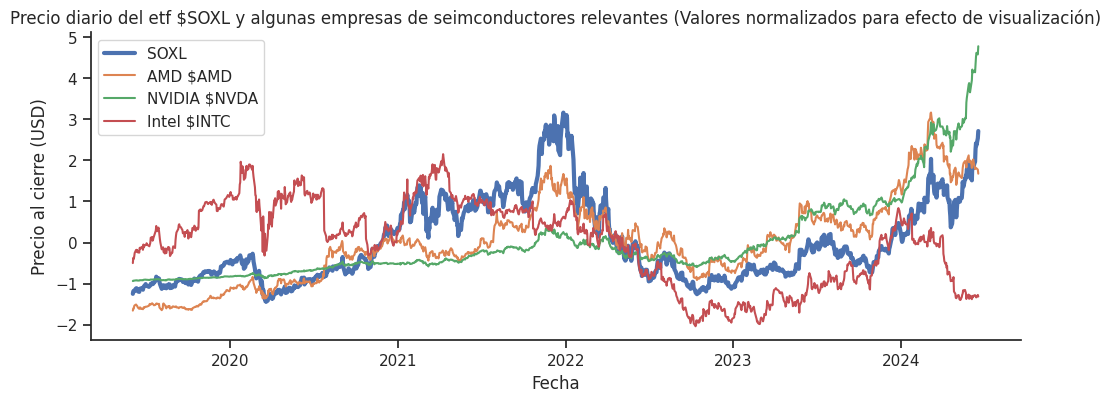

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the dataframe
z_merged_df = pd.DataFrame(scaler.fit_transform(merged_df), columns=merged_df.columns)
z_merged_df.index = merged_df.index #Saving the original index


plt.figure(figsize=(12, 4))
sns.lineplot(data=z_merged_df['SOXL'], label = "SOXL", linewidth = 3)
sns.lineplot(data=z_merged_df['AMD'], label = "AMD $AMD")
sns.lineplot(data=z_merged_df['NVDA'], label = "NVIDIA $NVDA")
sns.lineplot(data=z_merged_df['INTC'], label = "Intel $INTC")
plt.title('Precio diario del etf $SOXL y algunas empresas de seimconductores relevantes (Valores normalizados para efecto de visualización)')
plt.ylabel("Precio al cierre (USD)")
plt.xlabel("Fecha")

# Quitar bordes superior y derecho
sns.despine(right=True, top=True)
plt.show()

Note que restringimos la muestra para ver las correlaciones entre cada acción y el ETF


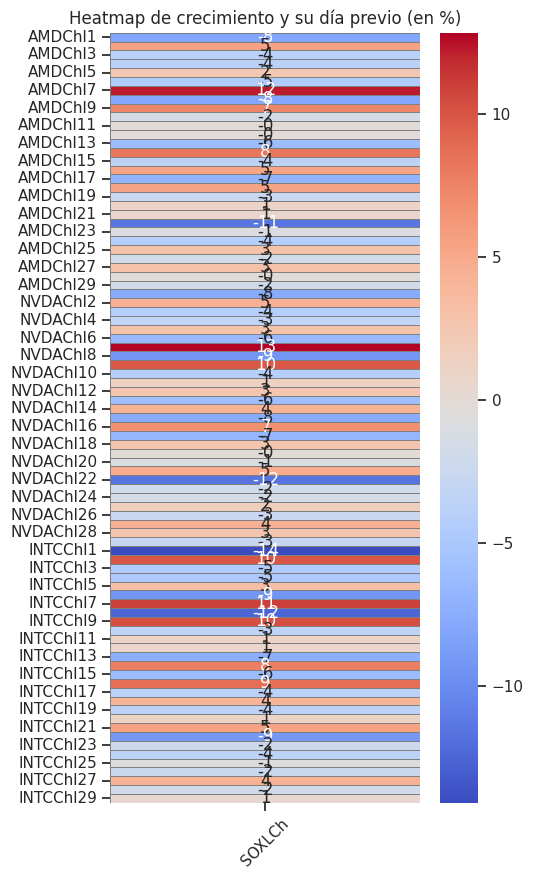

In [15]:
# Ahora veamos si la tendencia de Volumen de transacciones dice algo del cambio de precio
tserie_soxl_df = merged_df.copy()

tserie_soxl_df["SOXLCh"] = tserie_soxl_df['SOXL'].diff() / tserie_soxl_df['SOXL'].shift(1) * 100

tserie_soxl_df["AMDCh"] = tserie_soxl_df['AMD'].diff() / tserie_soxl_df['AMD'].shift(1) * 100
tserie_soxl_df["NVDACh"] = tserie_soxl_df['NVDA'].diff() / tserie_soxl_df['NVDA'].shift(1) * 100
tserie_soxl_df["INTCCh"] = tserie_soxl_df['INTC'].diff() / tserie_soxl_df['INTC'].shift(1) * 100
# Iterar para crear nuevas columnas con el desplazamiento
for i in range(1, 30, 1):
    new_col_name = f"AMDChl{i}"
    tserie_soxl_df[new_col_name] = tserie_soxl_df['AMDCh'].shift(i)
for i in range(1, 30, 1):
    new_col_name = f"NVDAChl{i}"
    tserie_soxl_df[new_col_name] = tserie_soxl_df['NVDACh'].shift(i)
for i in range(1, 30, 1):
    new_col_name = f"INTCChl{i}"
    tserie_soxl_df[new_col_name] = tserie_soxl_df['INTCCh'].shift(i)

filtered_columns = [col for col in tserie_soxl_df.columns if 'Chl' in col]
tserie_soxl_df = tserie_soxl_df[['SOXLCh'] + filtered_columns]
tserie_soxl_df

tserie_soxl_corr_matriz = tserie_soxl_df.corr() * 100

# Crear el mapa de calor
plt.figure(figsize=(5, 10))  # Tamaño del gráfico
sns.heatmap(tserie_soxl_corr_matriz[['SOXLCh']].iloc[1:], annot=True, cmap='coolwarm', linewidths=0.5, linecolor='gray', fmt=".0f")

# Ajustes adicionales
plt.title('Heatmap de crecimiento y su día previo (en %)')  # Título del gráfico
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x

# Mostrar el gráfico
print("Note que restringimos la muestra para ver las correlaciones entre cada acción y el ETF")
plt.show()

In [16]:
import statsmodels.api as sm

tsreg_series = tserie_soxl_df.dropna(subset=['SOXLCh', 'AMDChl7', "NVDAChl7", "INTCChl7"])

# Fit regression model
X = tsreg_series[['AMDChl7', 'NVDAChl7', 'INTCChl7']]
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(tsreg_series['SOXLCh'], X).fit(cov_type='HC3')

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 SOXLCh   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     4.592
Date:                Thu, 22 Aug 2024   Prob (F-statistic):            0.00333
Time:                        03:07:47   Log-Likelihood:                -4167.5
No. Observations:                1263   AIC:                             8343.
Df Residuals:                    1259   BIC:                             8364.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3194      0.188      1.696      0.0

In [17]:
#Corriendo un modelo de efectos fijos (para corregir por valor estacionales y de tendencias de tiempo)

import statsmodels.formula.api as smf
tsreg_series_fe = tserie_soxl_df.dropna(subset=['SOXLCh', 'AMDChl7', "NVDAChl7", "INTCChl7"])

tsreg_series_fe['Month'] = tsreg_series_fe.index.month
tsreg_series_fe['Year'] = tsreg_series_fe.index.year
tsreg_series_fe['month'] = pd.Categorical(tsreg_series_fe['Month'])
tsreg_series_fe['year'] = pd.Categorical(tsreg_series_fe['Year'])

# Fit the OLS model + fixed effects
fe_model = smf.ols("SOXLCh ~ C(month) + C(year) + AMDChl7 + NVDAChl7 + INTCChl7", data=tsreg_series_fe).fit(cov_type='HC3')

# Print model summary
print("Imprimiendo la regresión con efectos fijos para corregir por tendencias y efectos estacionales")
print(fe_model.summary())
print("Note que el efecto del valor de las empresas de los semiconductores no son estadísticamente distintas de ceros, por lo que habrá que explorar más variables para incluir en el modelo ")
print("También se buscará indagar con más rezagos y variables macroeconómicas")

Imprimiendo la regresión con efectos fijos para corregir por tendencias y efectos estacionales
                            OLS Regression Results                            
Dep. Variable:                 SOXLCh   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.700
Date:                Thu, 22 Aug 2024   Prob (F-statistic):             0.0304
Time:                        03:07:47   Log-Likelihood:                -4160.0
No. Observations:                1263   AIC:                             8360.
Df Residuals:                    1243   BIC:                             8463.
Df Model:                          19                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

<ipython-input-17-7dc7bd065369>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsreg_series_fe['Month'] = tsreg_series_fe.index.month
<ipython-input-17-7dc7bd065369>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsreg_series_fe['Year'] = tsreg_series_fe.index.year
<ipython-input-17-7dc7bd065369>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

## Segunda parte del curso
### Ingeniería de atributos: Creando variables que pudieran explicar el crecimiento de $SOXL


Se busca crear un modelo parsimonioso, para tener mucho menos variables explicativas y que todas ls posibles comporamientos de las acciones se resuman en un solo componente explicativo (PCA)

Total de la varianza explicada en este CP: [0.69201604]


Text(0.5, 1.0, 'Componente principal de la tasa de crecimiento diaria de AMD, NVDA, QCOM, INTEL')

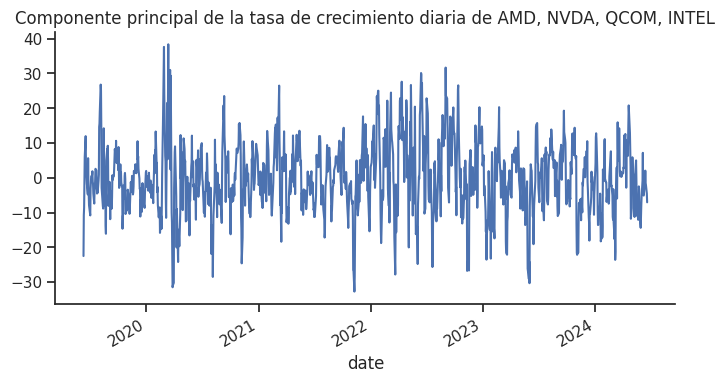

In [18]:
## Vamos a generer una copia de seguridad de nuestra base principal
tserie_soxl_df = merged_df.copy()
tserie_x_vars_df = tserie_soxl_df.drop(columns=['SOXL'])

tserie_x_vars_df['AMD'] = tserie_x_vars_df['AMD'].diff(5) / tserie_x_vars_df['AMD'].shift(5) * 100
tserie_x_vars_df['NVDA'] = tserie_x_vars_df['NVDA'].diff(5) / tserie_x_vars_df['NVDA'].shift(5) * 100
tserie_x_vars_df['INTC'] = tserie_x_vars_df['INTC'].diff(5) / tserie_x_vars_df['INTC'].shift(5) * 100
tserie_x_vars_df['QCOM'] = tserie_x_vars_df['QCOM'].diff(5) / tserie_x_vars_df['QCOM'].shift(5) * 100

tserie_x_vars_df = tserie_x_vars_df.dropna()

#Aplicando componentes principales
#!pip install scikit-learn
import numpy as np
from sklearn.decomposition import PCA


# Inicializar PCA para reducir a 2 componentes principales
pca = PCA(n_components=1)

# Ajustar PCA a los datos
tserie_pca_df = pca.fit_transform(tserie_x_vars_df)
print("Total de la varianza explicada en este CP:", pca.explained_variance_ratio_)

# Convert the index to datetime

tserie_pca_df = pd.DataFrame(tserie_pca_df)
tserie_pca_df.index = pd.to_datetime(merged_df.index[5:1271], errors='coerce')

tserie_pca_df


from matplotlib import pyplot as plt
tserie_pca_df[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Componente principal de la tasa de crecimiento diaria de AMD, NVDA, QCOM, INTEL')


## 5: Selección de modelos

En esta sección, se correrán distintos modelos:
Modelos individuales (SOXLS vs resto de variables)
Modelos Ridge o Lasso (para ver qué variables sin las más relevantes)
Modelo de compontenes principales
Modelo de efectos fijos

Se utilizará el criterio de Erros Cuadrado Medio, así como  las bondades de ajuste para validar qué modelo es mejor.

LASSO

In [19]:
# @title a): Modelo Lasso (vs todas las X posibles)


import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score


#Creando tasa de crecimiento semanal
tserie_soxl_df = merged_df.copy()
tserie_soxl_df['SOXL'] = tserie_soxl_df['SOXL'].diff(5) / tserie_soxl_df['SOXL'].shift(5) * 100
tserie_soxl_df['AMD'] = tserie_soxl_df['AMD'].diff(5) / tserie_soxl_df['AMD'].shift(5) * 100
tserie_soxl_df['NVDA'] = tserie_soxl_df['NVDA'].diff(5) / tserie_soxl_df['NVDA'].shift(5) * 100
tserie_soxl_df['INTC'] = tserie_soxl_df['INTC'].diff(5) / tserie_soxl_df['INTC'].shift(5) * 100
tserie_soxl_df['QCOM'] = tserie_soxl_df['QCOM'].diff(5) / tserie_soxl_df['QCOM'].shift(5) * 100

tserie_soxl_df = tserie_soxl_df.dropna()

#Creando vector de variables X y Y "del Modelo 1
X = tserie_soxl_df[["AMD", "NVDA", "INTC", "QCOM"]]
Y = tserie_soxl_df[["SOXL"]]

# Crear el modelo Lasso
lasso = Lasso(alpha=0.1)  # alpha es el parámetro de regularización

# Ajustar el modelo a los datos de entrenamiento
lasso.fit(X, Y)

print(f"Valor de los coeficientes:: {lasso.coef_}")

# Make predictions on the test set
y_pred = lasso.predict(X)

# Calculate Mean Squared Error
mse_lasso = mean_squared_error(Y, y_pred)
print(f"Error cuadrado medio: {mse_lasso}")

# Calculate R-squared
r2_lasso = r2_score(Y, y_pred)
print(f"R-2: {r2_lasso}")

Valor de los coeficientes:: [0.39631768 0.70205138 0.61001948 0.9043882 ]
Error cuadrado medio: 24.328719593224044
R-2: 0.8676694073288078


In [20]:
# @title b): Modelo tradicional (vs todas las X posibles)

X = tserie_soxl_df[['AMD', 'NVDA', 'INTC', "QCOM"]]
X = sm.add_constant(X)

model = sm.OLS(tserie_soxl_df['SOXL'], X).fit(cov_type='HC3')
model.summary()

# Calculate Mean Squared Error (MSE)
mse_trad = (model.resid ** 2).mean()
print(f"Mean Squared Error: {mse_trad}")


r2_trad = model.rsquared
print(f"R-squared: {r2_trad}")


Mean Squared Error: 24.328206562476186
R-squared: 0.867672197844053


In [21]:
# @title c): Modelo con componentes principales

X = sm.add_constant(tserie_pca_df)

model = sm.OLS(tserie_soxl_df['SOXL'], X).fit(cov_type='HC3')
model.summary()

# Calculate Mean Squared Error (MSE)
mse_pca = (model.resid ** 2).mean()
print(f"Mean Squared Error: {mse_pca}")

r2_pca = model.rsquared
print(f"R-squared: {r2_pca}")

model.summary()

Mean Squared Error: 30.308363879491544
R-squared: 0.8351444785370322


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SOXL   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     4388.
Date:                Thu, 22 Aug 2024   Prob (F-statistic):               0.00
Time:                        03:07:48   Log-Likelihood:                -3955.8
No. Observations:                1266   AIC:                             7916.
Df Residuals:                    1264   BIC:                             7926.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7680      0.155     11.404      0.000       1.464       2.072
0             -1.2179      0.018    -66.243      0.000      -1.254      -1.182
==============================================================================
Omnibus:                       61.230   Durbin-Watson:                   0.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.855
Skew:                          -0.122   Prob(JB):                     3.60e-42
Kurtosis:                       4.886   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [22]:
# @title d): Modelo con efectos fijos autoregressivo

#Corriendo un modelo de efectos fijos (para corregir por valor estacionales y de tendencias de tiempo)

import statsmodels.formula.api as smf

tserie_soxl_df_fe = tserie_soxl_df.copy()

tserie_soxl_df_fe["SOXL_l1"] = tserie_soxl_df['SOXL'].shift(1) * 100
tserie_soxl_df_fe = tserie_soxl_df_fe.dropna()

tserie_soxl_df_fe['Month'] = tserie_soxl_df_fe.index.month
tserie_soxl_df_fe['Year'] = tserie_soxl_df_fe.index.year
tserie_soxl_df_fe['month'] = pd.Categorical(tserie_soxl_df_fe['Month'])
tserie_soxl_df_fe['year'] = pd.Categorical(tserie_soxl_df_fe['Year'])

# Fit the OLS model + fixed effects
fe_model = smf.ols("SOXL ~ C(month) + C(year) + SOXL_l1", data=tserie_soxl_df_fe).fit(cov_type='HC3')


# Calculate Mean Squared Error (MSE)
mse_fe = (fe_model.resid ** 2).mean()
print(f"Mean Squared Error: {mse_fe}")

r2_fe = fe_model.rsquared
print(f"R-squared: {r2_fe}")


# Print model summary
print("Imprimiendo la regresión con efectos fijos para corregir por tendencias y efectos estacionales")
print(fe_model.summary())
print("Note que el efecto del valor de las empresas de los semiconductores no son estadísticamente distintas de ceros, por lo que habrá que explorar más variables para incluir en el modelo ")
print("También se buscará indagar con más rezagos y variables macroeconómicas")

Mean Squared Error: 72.51842066635139
R-squared: 0.6047039606328062
Imprimiendo la regresión con efectos fijos para corregir por tendencias y efectos estacionales
                            OLS Regression Results                            
Dep. Variable:                   SOXL   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     81.42
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          3.59e-188
Time:                        03:07:48   Log-Likelihood:                -4504.5
No. Observations:                1265   AIC:                             9045.
Df Residuals:                    1247   BIC:                             9138.
Df Model:                          17                                         
Covariance Type:                  HC3                                         
                      coef    std err          

In [23]:
# @title 5.2): Comparando los modelos

# Colectando las métricas
metrics = {
    "Modelo Tradicional (Y = X)": {"Error cuadrado medio": mse_trad, "R2": r2_trad},
    "Modelo Lasso": {"Error cuadrado medio": mse_lasso, "R2": r2_lasso},
    "Modelo PCA": {"Error cuadrado medio": mse_pca, "R2": r2_pca},
    "Modelo Autoregresivo con Efectos Fijos": {"Error cuadrado medio": mse_fe, "R2": r2_fe},
}

# Imprimiendo el cuadro de resultados
print(f"{'Modelo':<45} {'Error cuadrado medio':<20} {'R2':<10}")
print("="*75)

for model, metrics_dict in metrics.items():
    mse = round(metrics_dict["Error cuadrado medio"], 3)
    r2 = round(metrics_dict["R2"], 3)
    print(f"{model:<45} {mse:<20} {r2:<10}")

Modelo                                        Error cuadrado medio R2        
Modelo Tradicional (Y = X)                    24.328               0.868     
Modelo Lasso                                  24.329               0.868     
Modelo PCA                                    30.308               0.835     
Modelo Autoregresivo con Efectos Fijos        72.518               0.605     


## 6: Optimizando el modelo Lasso

El modelo Lasso es el modelo (junto con el "tradicional") que tiene el error cuadrado medio más bajo, por lo que este modelo podría ser el óptimo si quisieramos ajustar de mejor manera. [texto del vínculo](https://)

In [28]:
# @title 6.1): Comparando los modelos

#Creando tasa de crecimiento semanal
tserie_soxl_df = merged_df.copy()
tserie_soxl_df['SOXL'] = tserie_soxl_df['SOXL'].diff(5) / tserie_soxl_df['SOXL'].shift(5) * 100
tserie_soxl_df['AMD'] = tserie_soxl_df['AMD'].diff(5) / tserie_soxl_df['AMD'].shift(5) * 100
tserie_soxl_df['NVDA'] = tserie_soxl_df['NVDA'].diff(5) / tserie_soxl_df['NVDA'].shift(5) * 100
tserie_soxl_df['INTC'] = tserie_soxl_df['INTC'].diff(5) / tserie_soxl_df['INTC'].shift(5) * 100
tserie_soxl_df['QCOM'] = tserie_soxl_df['QCOM'].diff(5) / tserie_soxl_df['QCOM'].shift(5) * 100

tserie_soxl_df = tserie_soxl_df.dropna()

# Calculate the 1st and 99th percentiles
mins = tserie_soxl_df["SOXL"].quantile(0.01)  # 1st percentile
maxs = tserie_soxl_df["SOXL"].quantile(0.99)  # 99th percentile

# Create 'HiSOXL' column: set to 1 if 'SOXL' is greater than 'maxs', else 0
tserie_soxl_df['HiSOXL'] = (tserie_soxl_df['SOXL'] > maxs).astype(int)

# Create 'LoSOXL' column: set to 1 if 'SOXL' is less than 'mins', else 0
tserie_soxl_df['LoSOXL'] = (tserie_soxl_df['SOXL'] < mins).astype(int)

# Guardando solo hasta el año 2023 para predecir sobre lo que ocurra en 2024
tserie_soxl_df_train = tserie_soxl_df.loc[tserie_soxl_df.index < '2023-01-01']
tserie_soxl_df_test = tserie_soxl_df.loc[tserie_soxl_df.index >= '2023-01-01']


#Creando vector de variables X y Y "del Modelo 1
X = tserie_soxl_df_train[["AMD", "NVDA", "INTC", "QCOM", 'HiSOXL', 'LoSOXL']]
X_test = tserie_soxl_df_test[["AMD", "NVDA", "INTC", "QCOM", 'HiSOXL', 'LoSOXL']]
Y = tserie_soxl_df_train[["SOXL"]]
Y_test = tserie_soxl_df_test[["SOXL"]]



# Definir un rango de valores de alpha para probar (escala logaritmica)
alpha_values = np.logspace(0, 5, 1000)

# Inicializar variables para guardar el mejor alpha y el MSE mínimo
best_alpha = None
min_mse = float('inf')

for alpha in alpha_values:
    # Crear el modelo Lasso con el valor actual de alpha
    lasso = Lasso(alpha=alpha)

    # Ajustar el modelo a los datos de entrenamiento
    lasso.fit(X, Y)

    # Hacer predicciones sobre el conjunto de prueba
    y_pred = lasso.predict(X_test)

    # Calcular el error cuadrado medio
    mse_lasso = mean_squared_error(Y_test, y_pred)

    # Imprimir resultados
    #print(f"Alpha: {alpha}")
    #print(f"Valor de los coeficientes: {lasso.coef_}")
    #print(f"Error cuadrado medio: {mse_lasso}")

    # Calcular R-cuadrado
    r2_lasso = r2_score(Y_test, y_pred)
    #print(f"R-2: {r2_lasso}")

    # Verificar si el MSE actual es el más bajo
    if mse_lasso < min_mse:
        min_mse = mse_lasso
        best_alpha = alpha

print(f"El mejor valor de alpha es: {best_alpha} con un MSE de: {min_mse} y un R2 de {r2_lasso}")



# Colectando las métricas
metrics = {
    "Modelo Tradicional (Y = X)": {"Error cuadrado medio": mse_trad, "R2": r2_trad},
    "Modelo Lasso": {"Error cuadrado medio": mse_lasso, "R2": r2_lasso},
    "Modelo PCA": {"Error cuadrado medio": mse_pca, "R2": r2_pca},
    "Modelo Autoregresivo con Efectos Fijos": {"Error cuadrado medio": mse_fe, "R2": r2_fe},
    "Modelo Lasso optimizado": {"Error cuadrado medio": min_mse, "R2": r2_lasso},
}

# Imprimiendo el cuadro de resultados
print(f"{'Modelo':<45} {'Error cuadrado medio':<20} {'R2':<10}")
print("="*75)

for model, metrics_dict in metrics.items():
    mse = round(metrics_dict["Error cuadrado medio"], 3)
    r2 = round(metrics_dict["R2"], 3)
    print(f"{model:<45} {mse:<20} {r2:<10}")

El mejor valor de alpha es: 4.962444877628916 con un MSE de: 22.118617379257085 y un R2 de -0.03191799344492274
Modelo                                        Error cuadrado medio R2        
Modelo Tradicional (Y = X)                    24.328               0.868     
Modelo Lasso                                  147.036              -0.032    
Modelo PCA                                    30.308               0.835     
Modelo Autoregresivo con Efectos Fijos        72.518               0.605     
Modelo Lasso optimizado                       22.119               -0.032    


El modelo Lasso terminó optimizandose con un penalizador de 4.962. Por lo que este modelo será el empleado para predecir el valor de SOXL

Text(0.5, 0, 'Fecha')

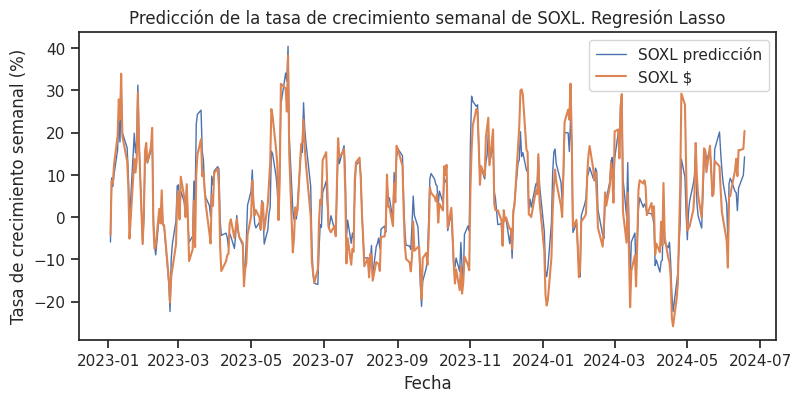

In [33]:
# @title 7): Prediciendo SOXL

# Crear el modelo Lasso con el valor actual de alpha
lasso = Lasso(alpha=4.962)

# Ajustar el modelo a los datos de entrenamiento
lasso.fit(X, Y)

# Hacer predicciones sobre el conjunto de prueba
y_pred = lasso.predict(X_test)

y_pred = pd.DataFrame(y_pred)

y_pred.index = Y_test.index

plt.figure(figsize=(9, 4))
sns.lineplot(data=y_pred[0], label = "SOXL predicción", linewidth = 1)
sns.lineplot(data=Y_test['SOXL'], label = "SOXL $")
plt.title('Predicción de la tasa de crecimiento semanal de SOXL. Regresión Lasso')
plt.ylabel("Tasa de crecimiento semanal (%)")
plt.xlabel("Fecha")

,SOXL,AMD,NVDA,INTC,QCOM,HiSOXL,LoSOXL
date,,,,,,,
2019-06-10,27.891984,20.485858,10.950814,7.685244,6.787826,0,0
2019-06-11,14.344922,9.604329,5.419565,4.599241,5.027278,0,0
2019-06-12,8.434835,9.084747,3.482464,3.973025,3.834680,0,0
2019-06-13,6.084006,-1.351352,3.115879,3.547682,3.462067,0,0
2019-06-14,-5.292556,-6.325206,-0.591066,0.347607,0.043660,0,0
...,...,...,...,...,...,...,...
2022-12-23,-11.747491,-1.360659,-8.237283,-3.083209,-3.221863,0,0
2022-12-27,-12.974083,-2.043654,-13.122912,-3.172830,-2.797279,0,0
2022-12-28,-14.889531,-3.812457,-12.738574,-3.403935,-4.576268,0,0
